In [1]:
import numpy as np
from lanczos import *
from timeIntegration import *
from plotting import *
from utils import *
from IPython.display import display, HTML, Markdown, Math, Latex

## Exercise 1
Here we compare Lanczos bidiagonalization with and without reorthogonalization with the rank $k$ best approximation of a invertible matrix A. The rank $k$ approximation from the Lanczos bidiagonalization SVD-approach are denoted $W$, and with the subscript $\perp$ if reorthogonalization is used. The rank k best approximation is denoted $X$.


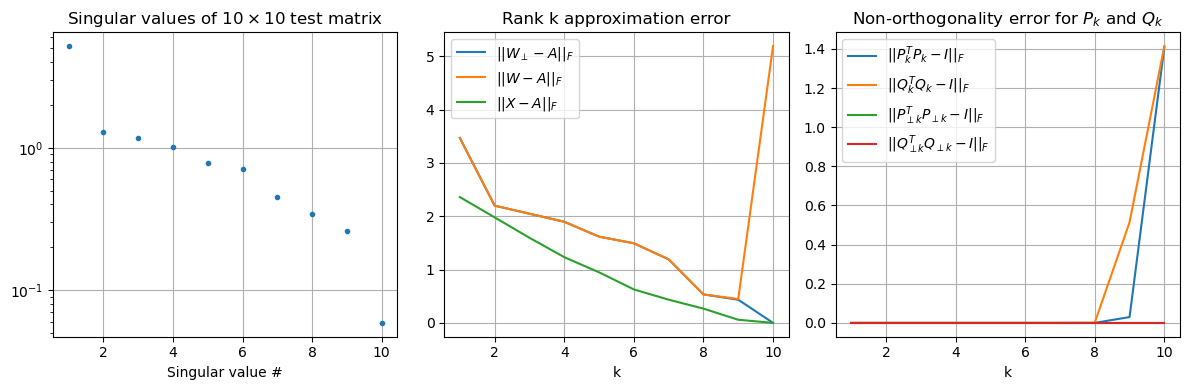

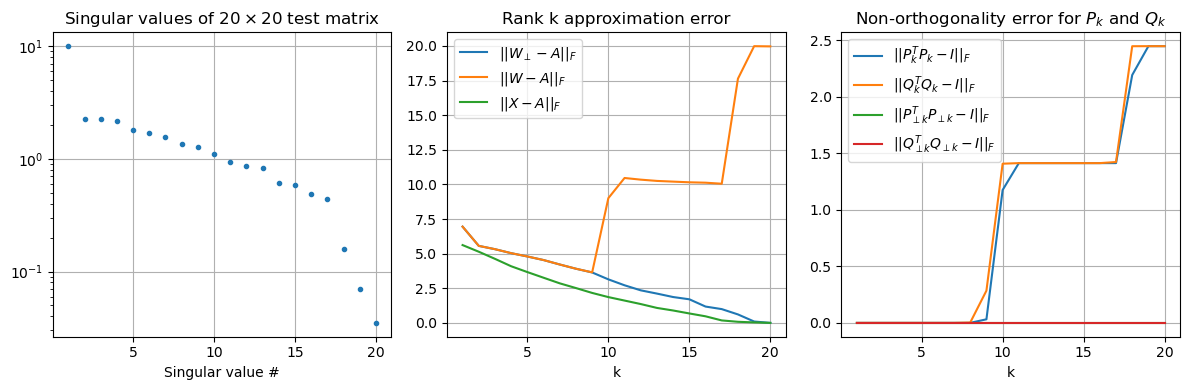

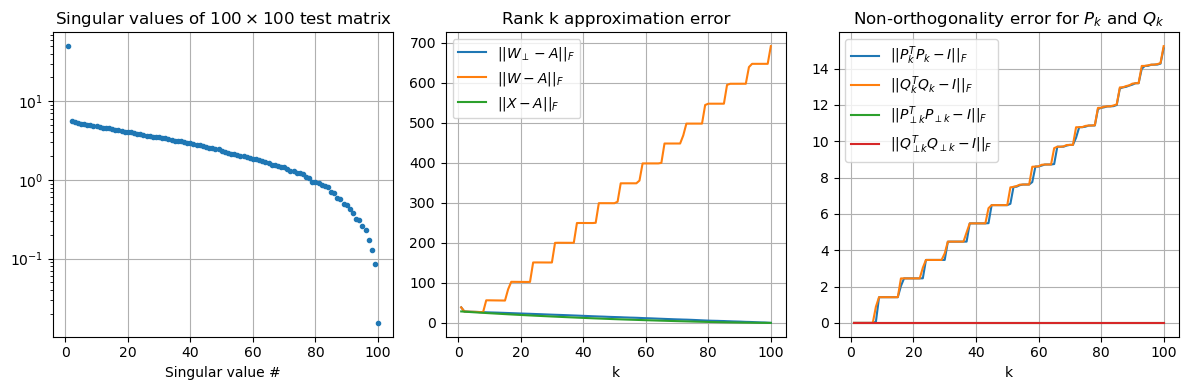

In [2]:
CompareRankkApproximation(ns=[10, 20, 100], res=4)

Comment something interpretation

## Exercise 3)
Here we compute a low rank approximation of a solution to the heat equation

\begin{aligned}
u_t & =u_{x x}+u_{y y} & & {[x, y]^T \in \Omega, t \in(0, T] } \\
u(x, y, 0) & =g(x, y) & & {[x, y]^T \in \Omega } \\
u(x, y, t) & =0 & & {[x, y]^T \in \partial \Omega, t \in(0, T] }
\end{aligned}

with 
$u(x, y, t)=e^{-5 \pi^2 t} \sin (\pi x) \sin (2 \pi y)$ 

and

$g(x, y)=\sin (\pi x) \sin (2 \pi y)$.


When evaluating $u$ on a grid, the resulting matrix is of rank 1, and therefore it is reasonable for the low-rank approximation to also be of rank 1, since it can't be any lower and it won't help being any higher.

We initiate the problem and plot the initial solution. 

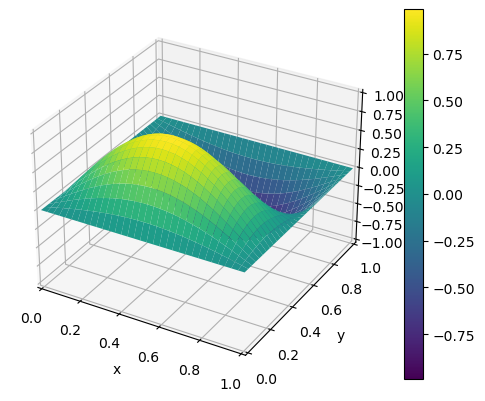

In [3]:
N = 32
k = 1

t0 = 0
tf = 0.2
h0 = 0.0005
A0 = initval(g, N)
U0, S0, V0 = getU0S0V0(A0, k)
TOL = 1e-5
maxcuts = 3
m = n = N+1
plotGrid3D(A0)

Starting integrating at t:0, with step size 0.0005
Finished integrating in 4401 steps, 2.6311564445495605s


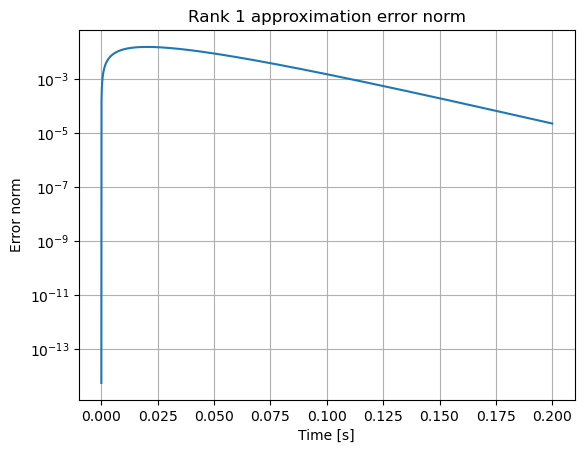

In [4]:

Ulist, Slist, Vlist, timesteps, dUlist, dSlist, dVlist, tRUn= TimeIntegration(t0, tf, h0, U0, S0, V0, 
                diff, linMatODEStep, 
                cay=cay1, verbose = 1,
                TOL= TOL, maxTimeCuts=maxcuts)
Ylist = makeY(Ulist, Slist, Vlist)
plotRankApproxError(Ylist, u, timesteps, k)

We see that the error is reasonable. At the beginning it is zero, then increases a bit as the true solution evolves, and then the error decreases as the solution approaches zero.

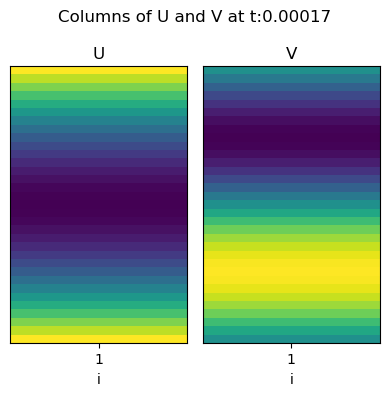

In [5]:
Ulist[1].shape
index = 10
plotCols(Ulist[index], Vlist[index], timesteps[index], res=2)

Here we clearly see that the single column of $U$ resembles a slice of the solution parallell to the x-axis and similiar for V and the y-axis. We know that in the SVD decomposition $A = USV^T$, the column space of $U$ equals the columns space of $A$ and the row space of $V$ equals the row space of $A$. From the plot of the solution we would expect that the U column has two peaks and the V column has one peak, but this is because the matrices are rotated $90$ degress in the code.

## Exercise 4)
Here we compute a low rank approximation of 

\begin{equation*}
    A(t)=Q_1(t)\left(A_1+e^t A_2\right) Q_2(t)^T, \quad t \in[0,1]
\end{equation*}

Below is an animation of this matrix with parameter $\epsilon=1e-3$

In [6]:
A, dA = makeAfuncs()
ts = np.linspace(0, 1, 120)
As = [A(t) for t in ts]
%matplotlib inline
name = animateMatrix(A)
HTML(f'<img src={name} />')

MovieWriter Pillow unavailable; using Pillow instead.


Now we to de low rank time integration with different $\epsilon$s used for constructing $A$

In [8]:
# epss = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
epss = [1e-1, 1e-3, 1e-4, 1e-5]
ks = [10, 20]
TOL = 1e-2
resultsByKByEps = {}
for k in ks:
    resultsByKByEps[k] = GetTimeIntegrationResults(epss=epss, k=k, verbose=0,
                            TOL=TOL)


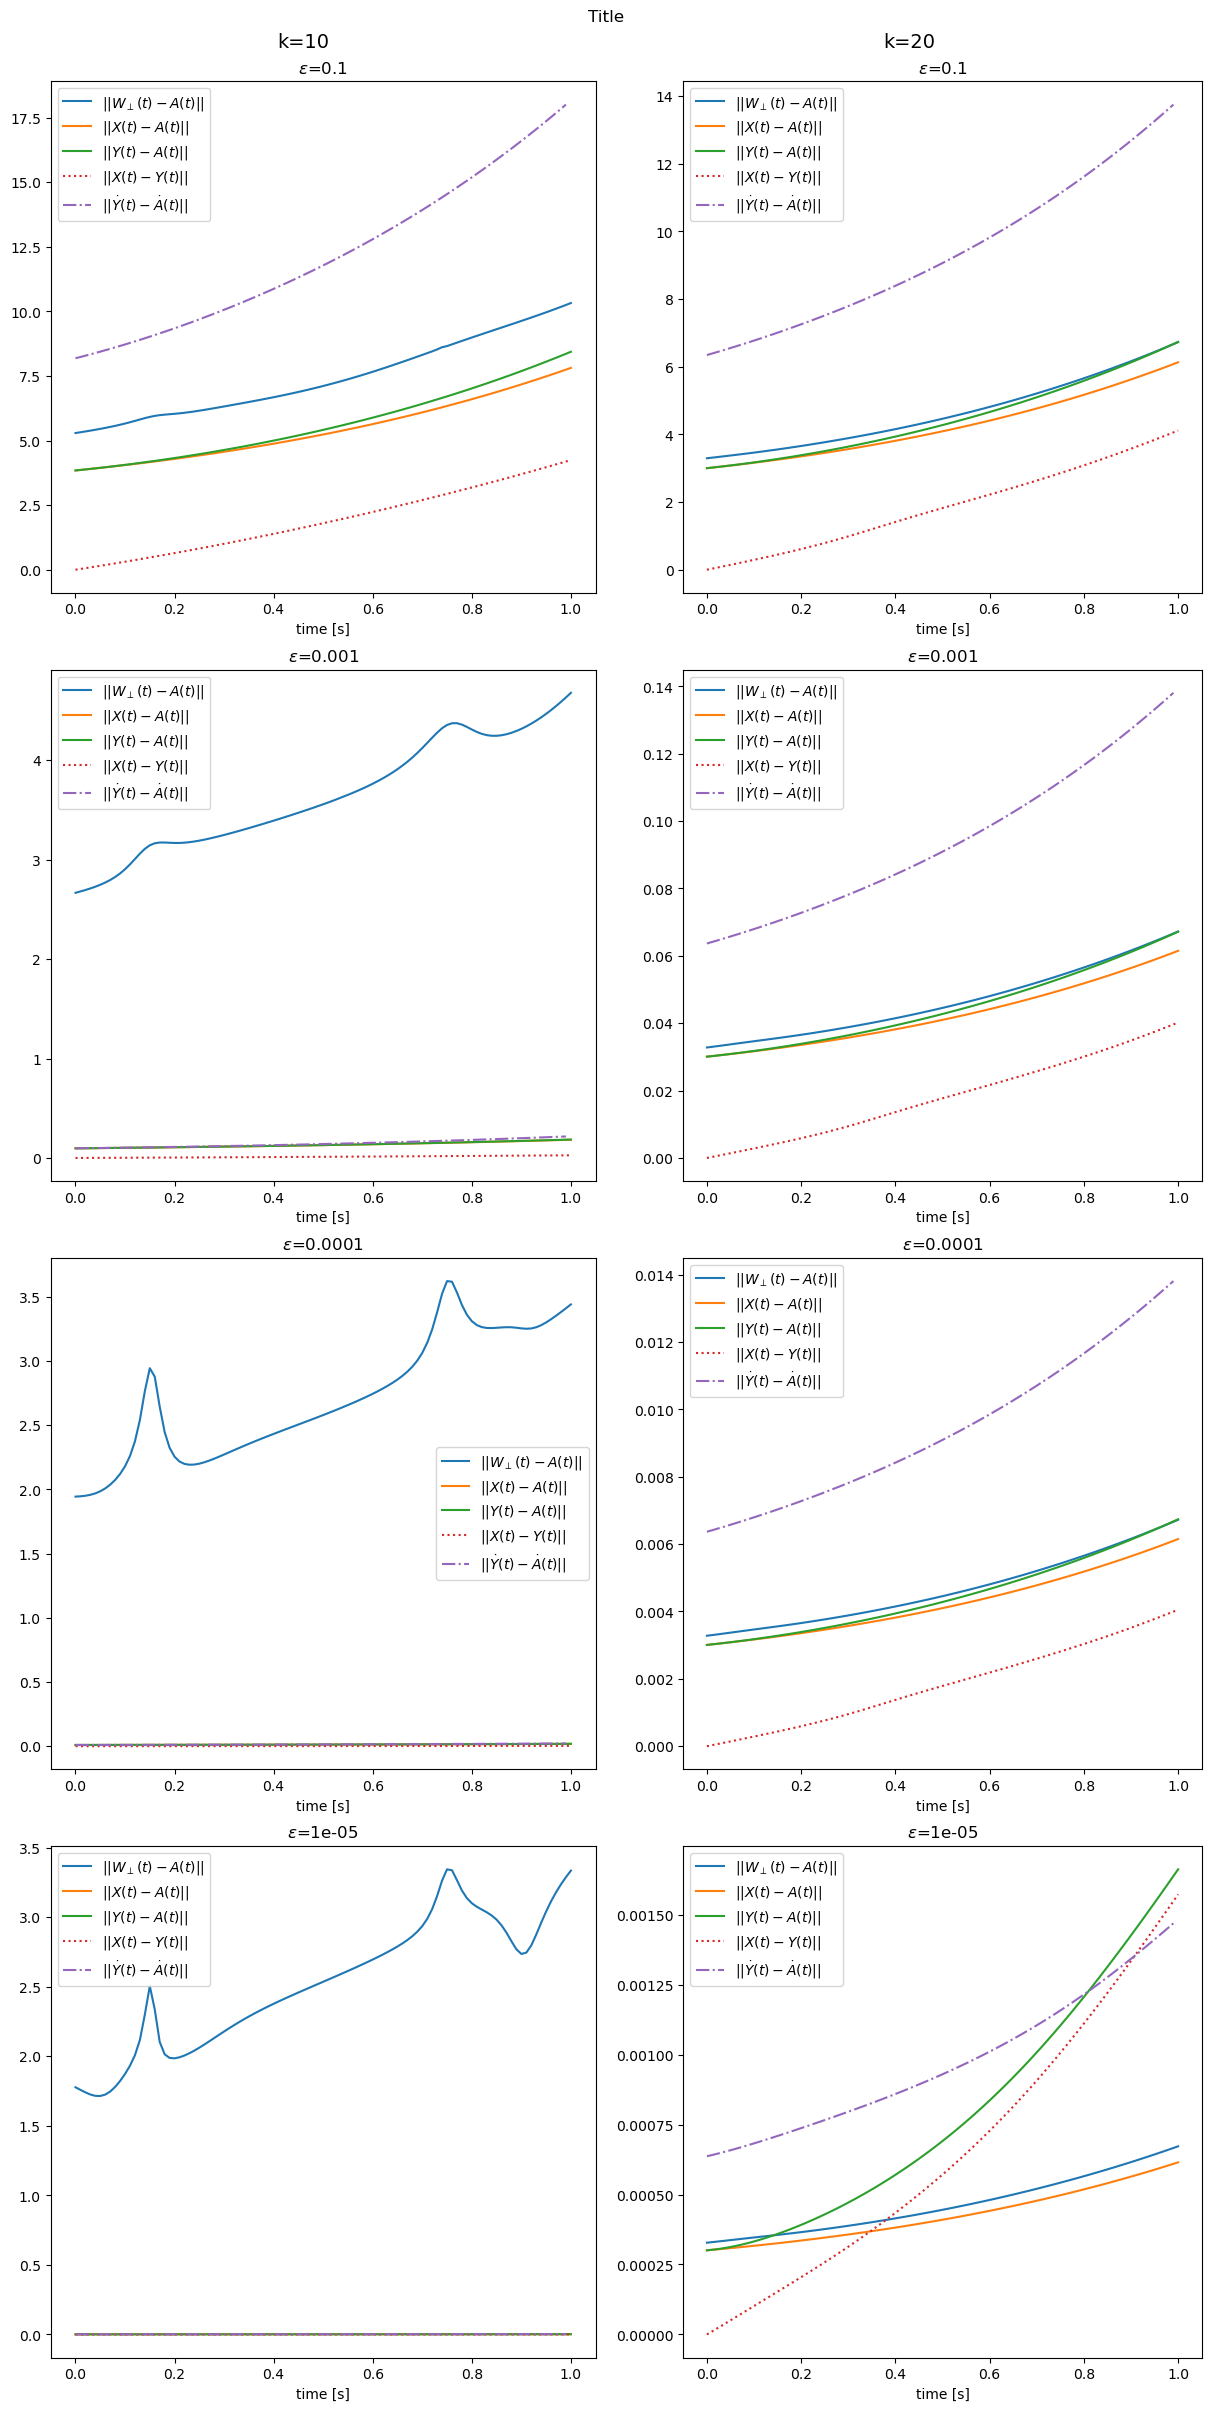

In [9]:
ksToPlot = 2
epssToPlot = len(epss)
plotErrors(resultsByKByEps, ks, epss, ksToPlot, epssToPlot, res=6)

In [10]:
tables = makeTables(resultsByKByEps)
# Loop through the tables dictionary to display each table with a title
for k, df_k in tables.items():
    display(HTML(f"<h3>Table for k={k}</h3>"))
    display(df_k)

,$\epsilon$,$||W(t)-A(t)||$,$||X(t)-A(t)||$,$||Y(t)-A(t)||$,$||X(t)-Y(t)||$,$||\dot{Y}(t)-\dot{A}(t)||$
3,0.00001,3.335118,0.001837,0.001908,0.000518,0.002167
2,0.00010,3.441701,0.018365,0.018555,0.002651,0.021628
1,0.00100,4.678310,0.183439,0.185337,0.026756,0.216236
0,0.10000,10.324541,7.813547,8.437960,4.245291,18.006455


,$\epsilon$,$||W(t)-A(t)||$,$||X(t)-A(t)||$,$||Y(t)-A(t)||$,$||X(t)-Y(t)||$,$||\dot{Y}(t)-\dot{A}(t)||$
3,0.00001,0.000672,0.000615,0.001662,0.001573,0.001469
2,0.00010,0.006723,0.006150,0.006737,0.004052,0.013808
1,0.00100,0.067228,0.061498,0.067169,0.040197,0.138076
0,0.10000,6.729187,6.132426,6.734299,4.115281,13.750129


## Exercise 5)



In [13]:
epss = [1e-1, 1e-3, 1e-4, 1e-5]
ks = [5, 20]
TOL = 1e-2
tf=10
h0 = 0.1
resultsByKByEps2 = {}
for k in ks:
    resultsByKByEps2[k] = GetTimeIntegrationResults(epss=epss, k=k, verbose=2,
                            TOL=TOL, cosMult=True, tf=tf, h0=h0)

Starting integrating at t:0, with step size 0.1
Solving step 1 from t:0. Trying h:0.1
Cutting time step. h:0.05, count:0
Cutting time step. h:0.025, count:1
Step complete. Now at t=0.025
Solving step 2 from t:0.025. Trying h:0.025
Step complete. Now at t=0.05
Solving step 3 from t:0.05. Trying h:0.025
Step complete. Now at t=0.07500000000000001
Solving step 4 from t:0.075. Trying h:0.025
Step complete. Now at t=0.1
Solving step 5 from t:0.1. Trying h:0.025
Step complete. Now at t=0.125
Solving step 6 from t:0.125. Trying h:0.025
Step complete. Now at t=0.15
Solving step 7 from t:0.15. Trying h:0.025
Step complete. Now at t=0.175
Solving step 8 from t:0.175. Trying h:0.025
Step complete. Now at t=0.19999999999999998
Solving step 9 from t:0.2. Trying h:0.025
Step complete. Now at t=0.22499999999999998
Solving step 10 from t:0.225. Trying h:0.025
Step complete. Now at t=0.24999999999999997
Solving step 11 from t:0.25. Trying h:0.025
Step complete. Now at t=0.27499999999999997
Solving step

KeyboardInterrupt: 

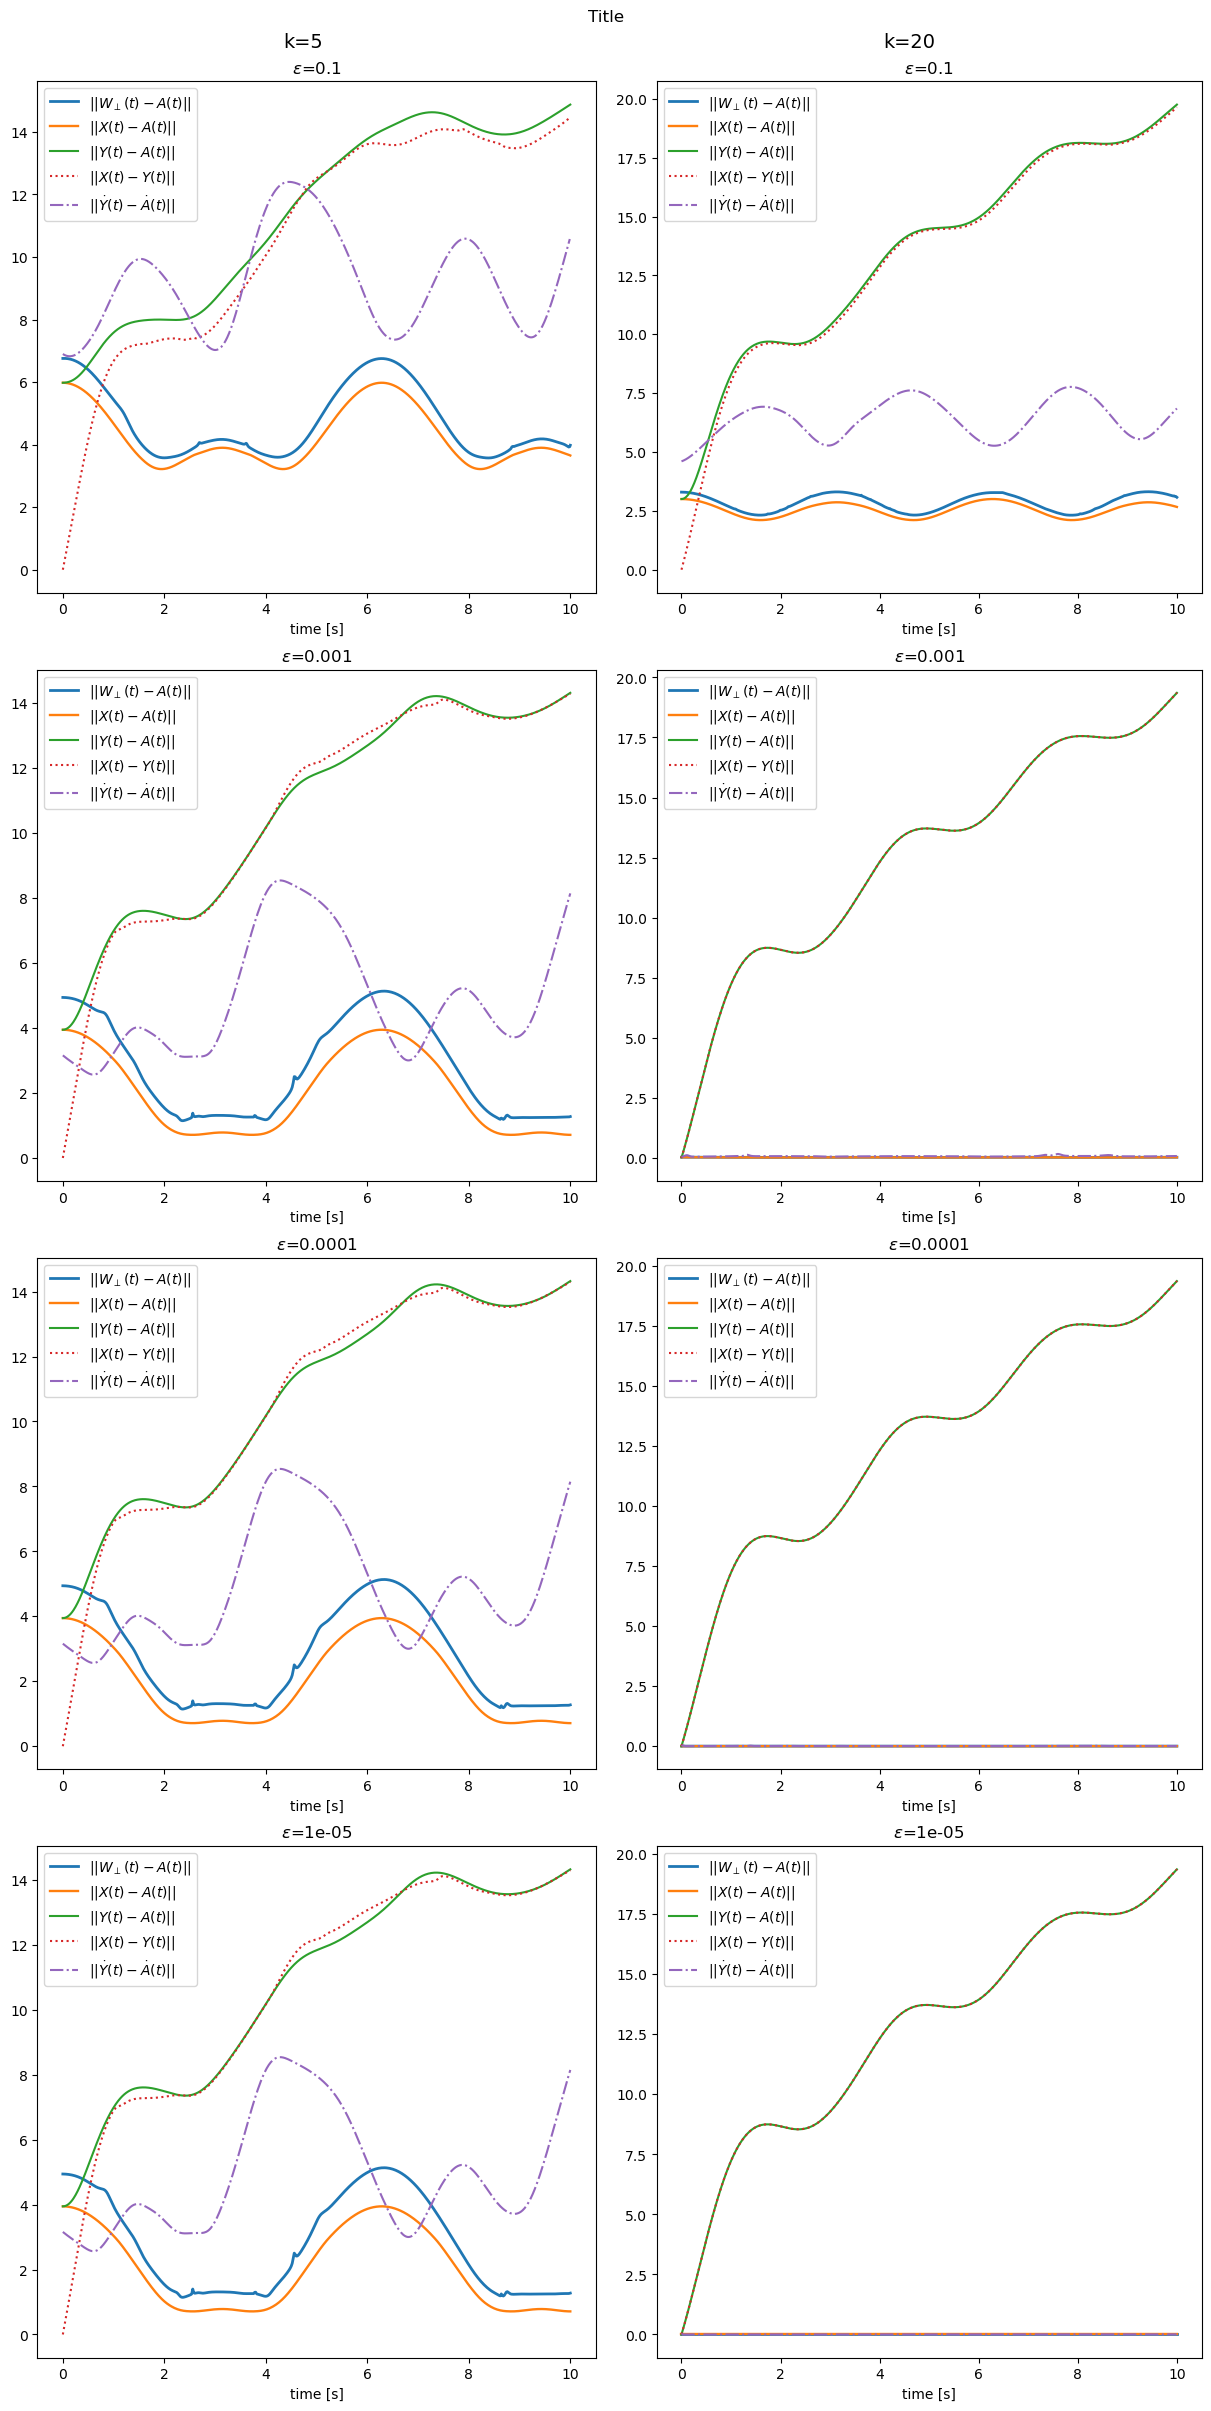

In [ ]:
ksToPlot = 2
epssToPlot = len(epss)
plotErrors(resultsByKByEps2, ks, epss, ksToPlot, epssToPlot, res=6)